In [ ]:
pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-no278vgp
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-no278vgp
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 93.2 MB/s eta 0:00:00


In [ ]:
import torch
import clip
from PIL import Image
import os
import requests
from io import BytesIO
import fitz  # PyMuPDF

In [ ]:
import requests
from PIL import Image
from io import BytesIO

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Class descriptions
class_names = ["a medical image like an X-ray, MRI, CT scan , radiology image, a scan image showing internal body structures",
               "a non-medical image like a landscape, animal, object, a non-medical image with no clinical content, a colorful photo taken outdoors"]

In [ ]:
text_inputs = torch.cat([clip.tokenize(f"This is {c}") for c in class_names]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_inputs)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)


In [ ]:
from torchvision import transforms

In [ ]:
def classify_image(input_path_or_url):


    def load_image_from_pdf(pdf_path):
     doc = fitz.open(pdf_path)
     page = doc.load_page(0)
     pix = page.get_pixmap()
     img_bytes = pix.tobytes("png")
     image = Image.open(BytesIO(img_bytes)).convert("RGB")
     doc.close()
     return image


    def load_image_from_url(url):
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses (4xx/5xx)
        return Image.open(BytesIO(response.content)).convert("RGB")

    # Preprocessing function for CLIP ViT-B/32
    preprocess = transforms.Compose([
        transforms.Resize(224, interpolation=transforms.InterpolationMode.BICUBIC),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=(0.48145466, 0.4578275, 0.40821073),
            std=(0.26862954, 0.26130258, 0.27577711)
        ),
    ])

    try:

        if input_path_or_url.lower().endswith(".pdf"):
            image = load_image_from_pdf(input_path_or_url)  # <-- Make sure this is defined elsewhere
        elif input_path_or_url.startswith("http://") or input_path_or_url.startswith("https://"):
            image = load_image_from_url(input_path_or_url)
        else:
            image = Image.open(input_path_or_url).convert("RGB")


        image_input = preprocess(image).unsqueeze(0).to(device)  # Add batch dim and move to device

        with torch.no_grad():
            image_features = model.encode_image(image_input)
            image_features = image_features / image_features.norm(dim=-1, keepdim=True)
            similarity = (image_features @ text_features.T).squeeze(0)
            probs = similarity.softmax(dim=0)

        pred_idx = probs.argmax().item()
        pred_label = "Medical Related Image " if pred_idx == 0 else "Non-Medical Image"

        return pred_label


    except Exception as e:
        print(f"[ERROR] {e}")
        return "Error", [0.0, 0.0]


In [ ]:

path2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9ZTyDACFg_zgPzhJ5gLiNyBXaRaXkIKgExQ&s"

path1 = "https://images.pexels.com/photos/18682254/pexels-photo-18682254.jpeg?cs=srgb&dl=pexels-ma-jacky-388296502-18682254.jpg&fm=jpg"

path3 ="https://media.worldnomads.com/learnimages/2019/newimages/Annapurna_120919-402.jpg"

path ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQutD176CyZqU1fVjK0mEwuhCj96dk57J_bEg&s"

     # a local PDF file with a single image



In [ ]:
from IPython.display import display

In [ ]:

label = classify_image(path)


In [ ]:
response = requests.get(path)
response.raise_for_status()  # Raise an error for bad responses (4xx/5xx)
image = Image.open(BytesIO(response.content)).convert("RGB")
resized_image = image.resize((224, 224), Image.BICUBIC)

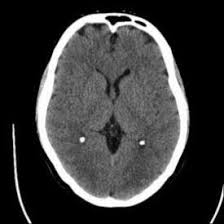

Medical Related Image 


In [ ]:

display(resized_image)
print(label)

